256


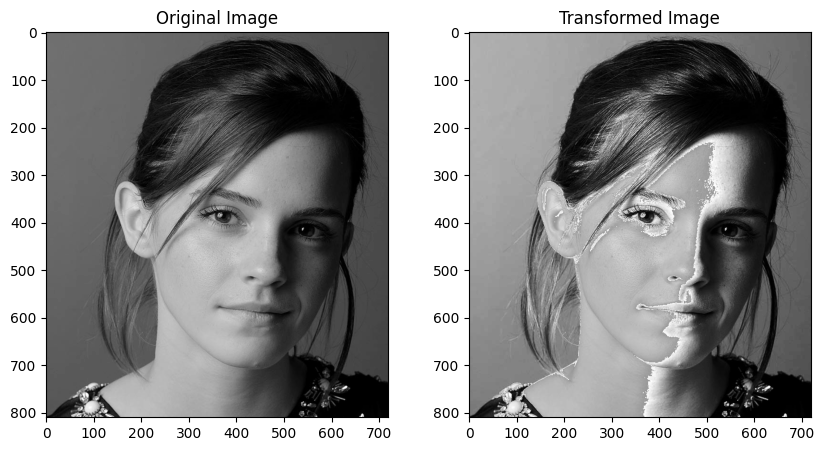

True

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the breakpoints for the intensity transformation
c = np.array([(50, 100), (150, 255)])

# Create the transformation function for each segment
t1 = np.linspace(0, c[0,0], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[0,0] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')
t3 = np.linspace(c[1,0] + 1, 255, 255 - c[1,0]).astype('uint8')

# Combine the transformations
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

# Print the length of the transformation (it should be 256, one for each intensity level)
print(len(transform))

# Load the grayscale image
img_orig = cv.imread(r'Img\emma.jpg', cv.IMREAD_GRAYSCALE)

# Apply the intensity transformation using cv.LUT
image_transformed = cv.LUT(img_orig, transform)

# Display the original and transformed image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_orig, cmap='gray')
plt.title('Original Image')

# Transformed image
plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')

plt.show()

# Save the result
cv.imwrite('image_transformed.jpg', image_transformed)


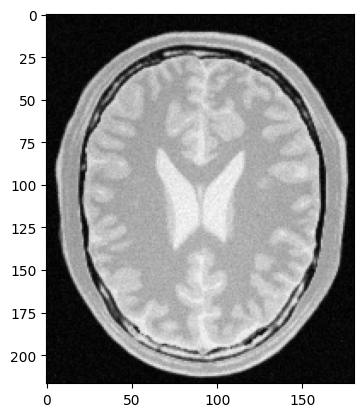

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image
image_path = r"Img\brain_proton_density_slice.png"
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)


# Display the image
plt.imshow(image, cmap='gray')
plt.show()


Intensity at point White Matter: 170
Intensity at point Gray Matter: 225


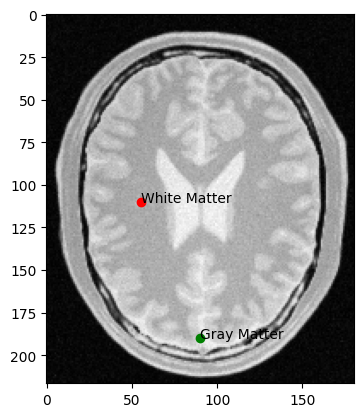

In [15]:
# Define the coordinates of the two points
point1 = (55, 110)  
point2 = (90, 190)  

# Get the intensity values at the two points
intensity1 = image[point1[1], point1[0]]
intensity2 = image[point2[1], point2[0]]

# Print the intensity values
print("Intensity at point White Matter:", intensity1)
print("Intensity at point Gray Matter:", intensity2)

# Display the image with marked points
plt.imshow(image, cmap='gray')  # Display the grayscale image
plt.plot(point1[0], point1[1], 'ro')  # Mark point 1 with a red dot
plt.annotate('White Matter', (point1[0], point1[1]))  
plt.plot(point2[0], point2[1], 'go')  # Mark point 2 with a green dot
plt.annotate('Gray Matter', (point2[0], point2[1])) 
plt.show()

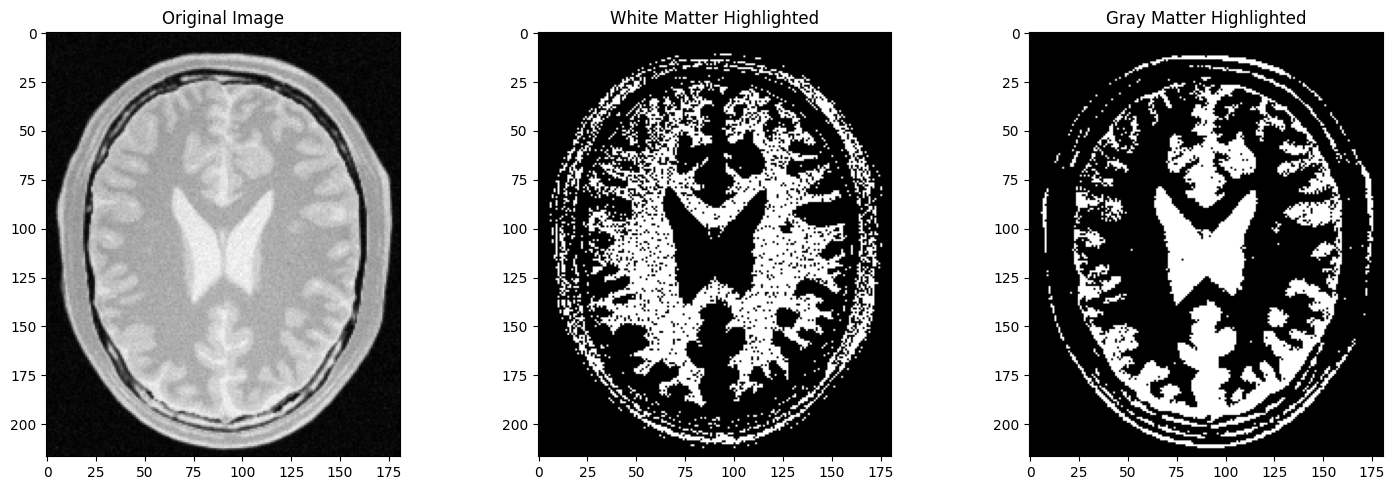

In [21]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define intensity breakpoints for white matter and gray matter
# White matter (170 ± 10) -> map to high intensity (255), others to 0
# Gray matter (225 ± 10) -> map to high intensity (255), others to 0
white_matter_start, white_matter_end = 170 - 10, 170 + 10
gray_matter_start, gray_matter_end = 225 - 35, 225 + 25

# Create two copies of the original image to transform separately for white and gray matter
white_matter_img = np.zeros_like(img)
gray_matter_img = np.zeros_like(img)

# Apply the transformation for white matter
white_matter_mask = (img >= white_matter_start) & (img <= white_matter_end)
white_matter_img[white_matter_mask] = 255  # Set white matter to high intensity

# Apply the transformation for gray matter
gray_matter_mask = (img >= gray_matter_start) & (img <= gray_matter_end)
gray_matter_img[gray_matter_mask] = 255  # Set gray matter to high intensity

# Display the original, white matter, and gray matter images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('White Matter Highlighted')
plt.imshow(white_matter_img, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Gray Matter Highlighted')
plt.imshow(gray_matter_img, cmap='gray')

plt.tight_layout()
plt.show()


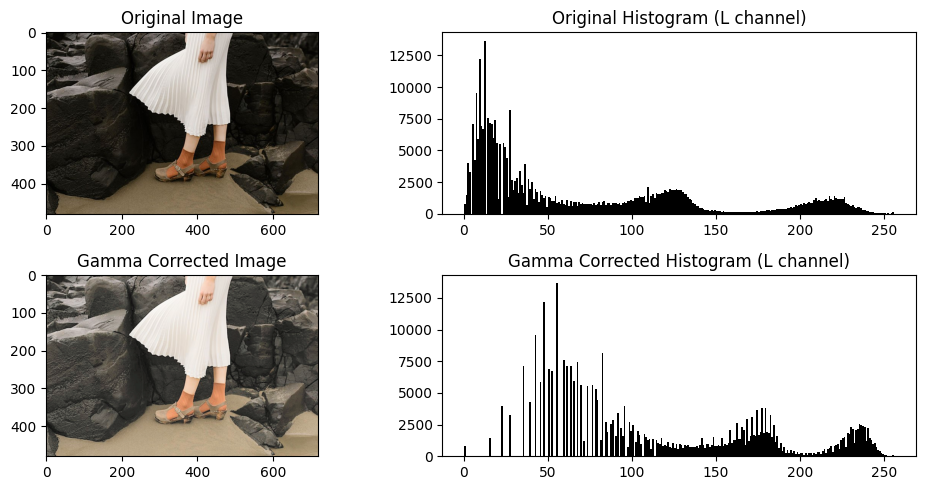

In [6]:
# Load the image
image_path = r'Img\highlights_and_shadows.jpg'
img = cv2.imread(image_path)

# Convert the image to L*a*b* color space
lab_image = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Extract the L (lightness) channel
L, a, b = cv2.split(lab_image)

# Apply gamma correction
gamma = 0.5  # You can adjust gamma value
L_gamma_corrected = np.array(255 * (L / 255) ** gamma, dtype='uint8')

# Merge the modified L channel back with the original a and b channels
lab_image_gamma_corrected = cv2.merge((L_gamma_corrected, a, b))

# Convert back to BGR color space for display
img_gamma_corrected = cv2.cvtColor(lab_image_gamma_corrected, cv2.COLOR_LAB2BGR)

# Plot the original and gamma corrected images with histograms
plt.figure(figsize=(10, 5))

# Original image and histogram
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title('Original Histogram (L channel)')
plt.hist(L.ravel(), bins=256, range=[0, 256], color='black')

# Gamma corrected image and histogram
plt.subplot(2, 2, 3)
plt.title('Gamma Corrected Image')
plt.imshow(cv2.cvtColor(img_gamma_corrected, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.title('Gamma Corrected Histogram (L channel)')
plt.hist(L_gamma_corrected.ravel(), bins=256, range=[0, 256], color='black')

plt.tight_layout()
plt.show()

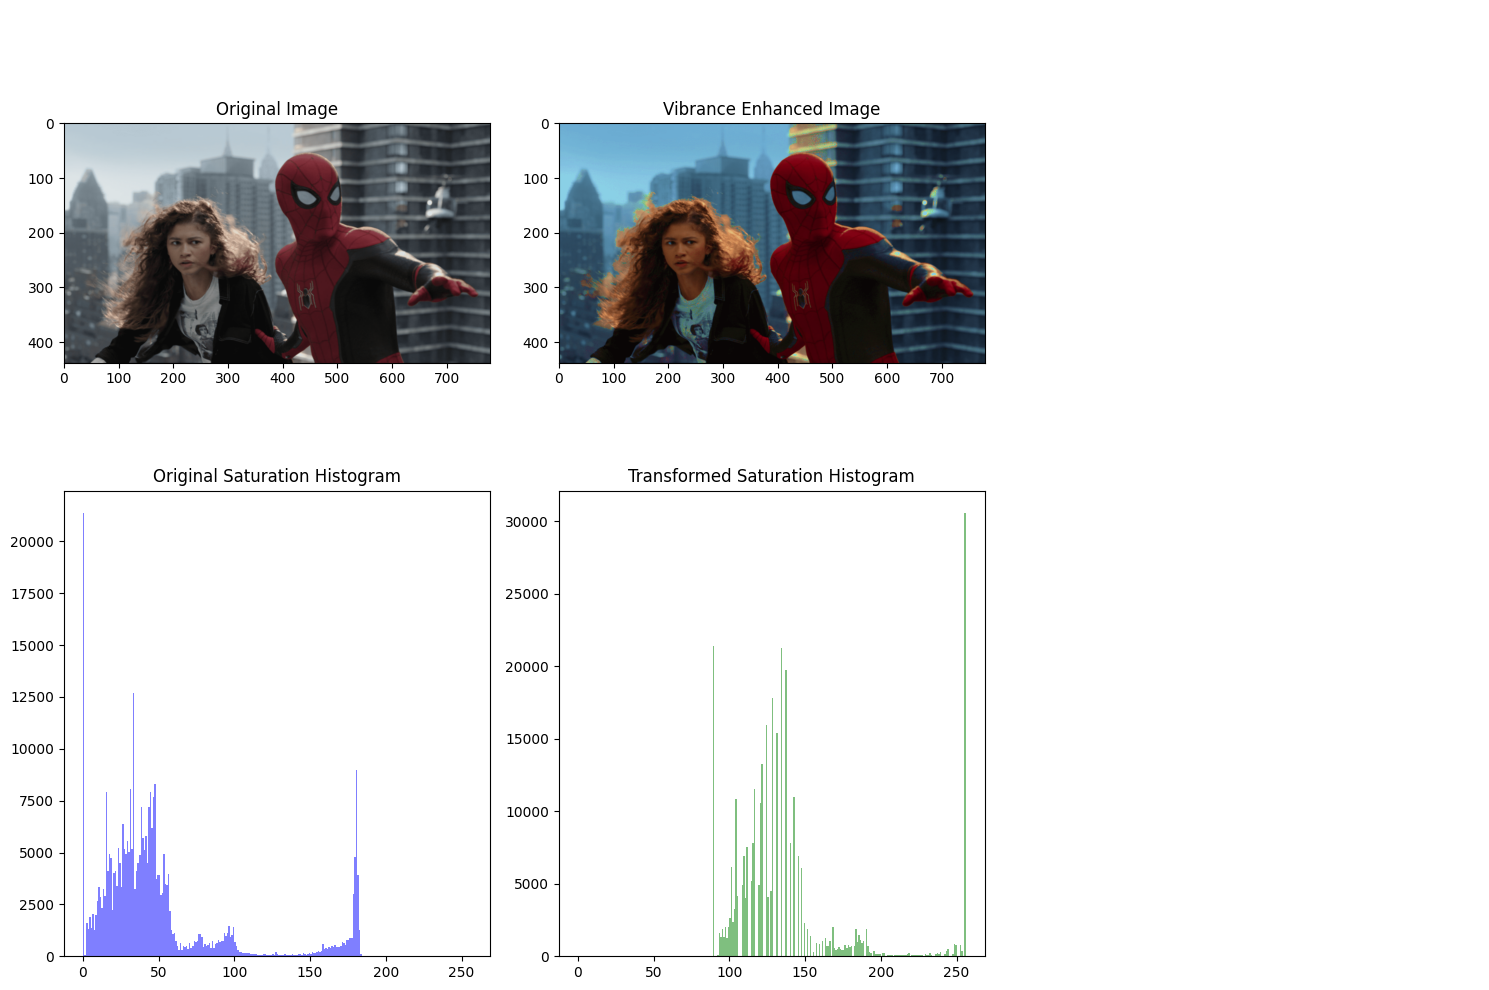

Chosen value of a: 0.7


In [7]:
# Function to apply the intensity transformation
def vibrance_enhancement(saturation_channel, a, sigma=70):
    x = saturation_channel
    transformation = np.clip(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 0, 255)
    return transformation.astype('uint8')

# Load the image
img = cv2.imread(r'Img\spider.png')

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Split the channels
h, s, v = cv2.split(hsv_image)

# Apply the vibrance transformation to the saturation channel
a_value = 0.7  # Adjust 'a' for visual enhancement
s_transformed = vibrance_enhancement(s, a_value)

# Recombine the HSV channels
hsv_transformed = cv2.merge((h, s_transformed, v))

# Convert back to BGR for display
img_vibrance_enhanced = cv2.cvtColor(hsv_transformed, cv2.COLOR_HSV2BGR)

# Display the original, transformed images, and their saturation histograms
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Vibrance Enhanced Image')
plt.imshow(cv2.cvtColor(img_vibrance_enhanced, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 3)
plt.axis('off')  # Turn off the axis for this subplot

plt.subplot(2, 3, 4)
plt.title('Original Saturation Histogram')
plt.hist(s.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.5)

plt.subplot(2, 3, 5)
plt.title('Transformed Saturation Histogram')
plt.hist(s_transformed.ravel(), bins=256, range=[0, 256], color='green', alpha=0.5)

plt.subplot(2, 3, 6)
plt.axis('off')  # Turn off the axis for this subplot

plt.tight_layout()
plt.show()

print(f'Chosen value of a: {a_value}')


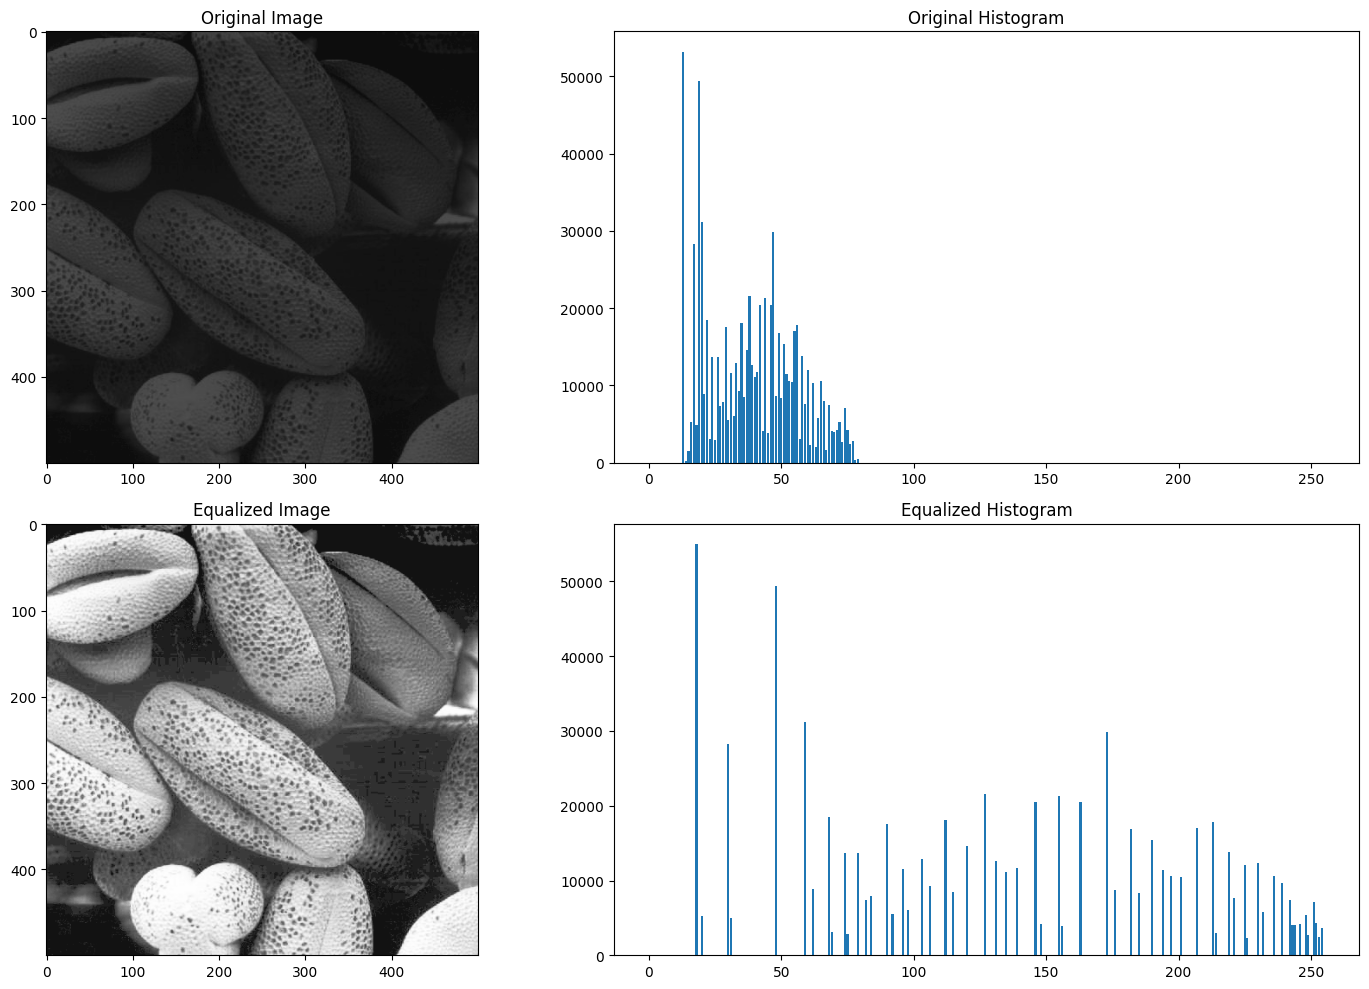

In [8]:
# Load the image
image_path = r"Img\shells.tif"
image = cv2.imread(image_path)

def histogram_equalization(image):
    # Get the histogram of the original image
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum() / hist.sum()

    # Map the CDF to the range [0, 255]
    cdf = (cdf * 255).astype('uint8')

    # Apply the CDF to the image
    equalized_image = cdf[image]

    # Get the histogram of the equalized image
    equalized_hist, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])

    # Display the original and equalized images and their histograms
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')

    plt.subplot(2, 2, 2)
    plt.title('Original Histogram')
    plt.bar(range(256), hist)

    plt.subplot(2, 2, 3)
    plt.title('Equalized Image')
    plt.imshow(equalized_image, cmap='gray')

    plt.subplot(2, 2, 4)
    plt.title('Equalized Histogram')
    plt.bar(range(256), equalized_hist)

    plt.tight_layout()
    plt.show()

    return equalized_image


# Perform histogram equalization
equalized_image = histogram_equalization(image)

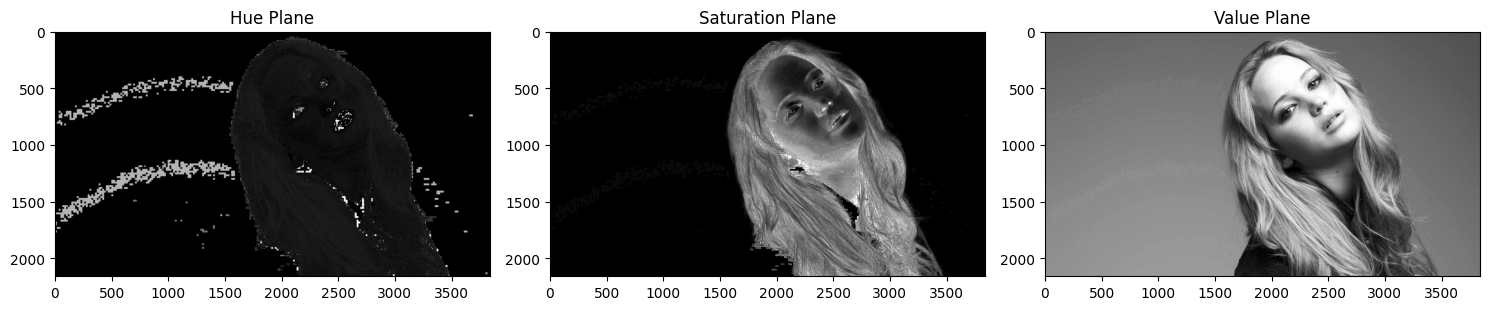

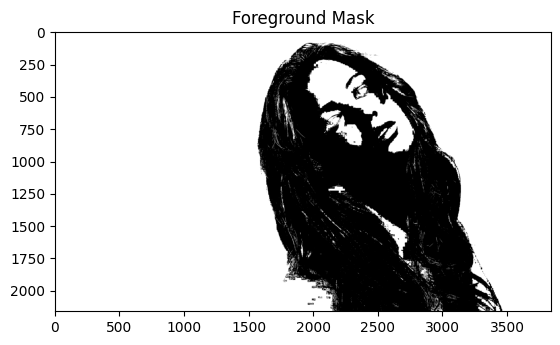

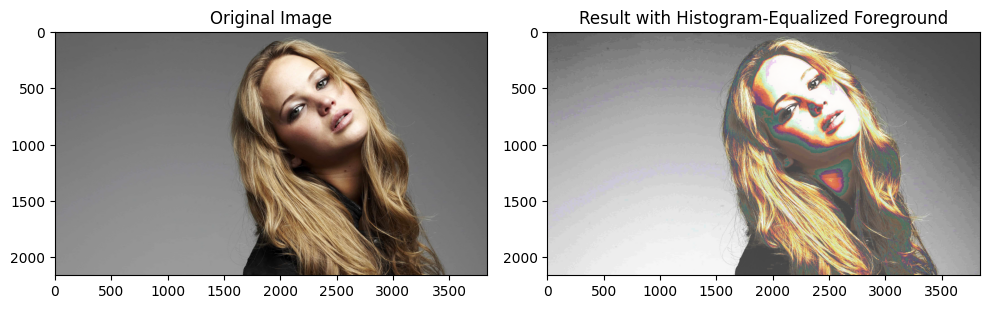

In [9]:
# Load the image
image_path = r"Img\jeniffer.jpg"
image = cv2.imread(image_path)

# Convert the image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into hue, saturation, and value planes
hue, saturation, value = cv2.split(hsv_image)

# Display the hue, saturation, and value planes in grayscale
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Hue Plane')
plt.imshow(hue, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Saturation Plane')
plt.imshow(saturation, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Value Plane')
plt.imshow(value, cmap='gray')

plt.tight_layout()
plt.show()

# Select the appropriate plane to threshold and extract the foreground mask
# We'll use the value plane for thresholding
_, mask = cv2.threshold(saturation, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Display the mask
plt.imshow(mask, cmap='gray')
plt.title('Foreground Mask')
plt.show()

# Obtain the foreground only using cv.bitwise_and
foreground = cv2.bitwise_and(image, image, mask=mask)

# Compute the histogram of the foreground
hist, bins = np.histogram(foreground.flatten(), 256, [0, 256])

# Obtain the cumulative sum of the histogram using np.cumsum
cdf = np.cumsum(hist) / hist.sum()

# Use the formulas in slides to histogram-equalize the foreground
cdf = (cdf * 255).astype('uint8')
equalized_foreground = cdf[foreground]

# Extract the background
background = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))

# Add the background and the histogram-equalized foreground
result = cv2.bitwise_or(background, equalized_foreground)

# Display the original image and the result with the histogram-equalized foreground
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Result with Histogram-Equalized Foreground')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

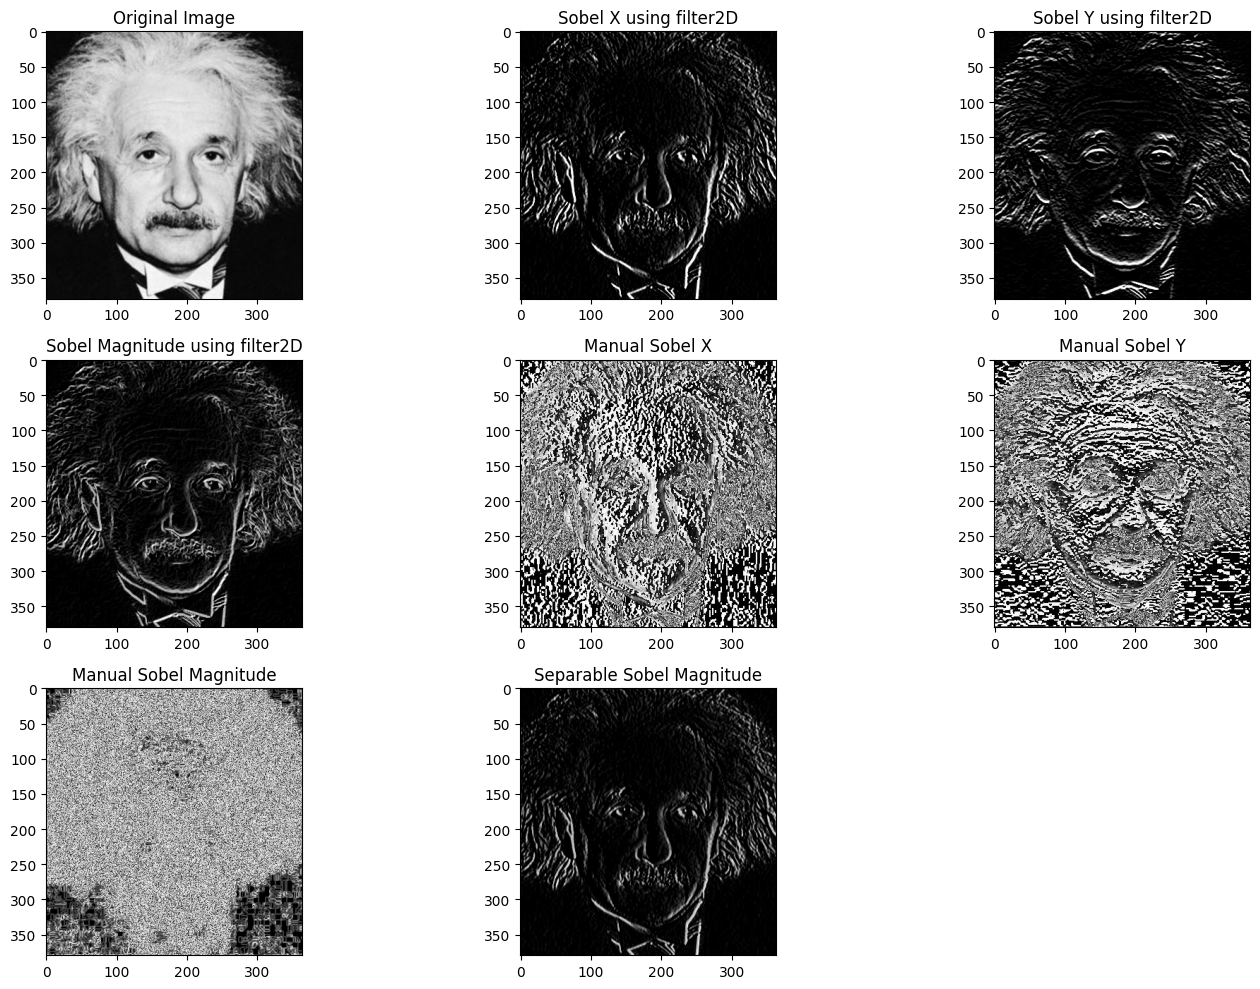

In [10]:
# Load the image in grayscale
image_path = 'Img\einstein.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Part (a) - Using filter2D to apply Sobel filter
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

filtered_x = cv2.filter2D(img, -1, sobel_x)
filtered_y = cv2.filter2D(img, -1, sobel_y)

# Combine both Sobel filters to get the gradient magnitude
filtered_magnitude = cv2.magnitude(filtered_x.astype(np.float32), filtered_y.astype(np.float32))

# Part (b) - Implementing Sobel filter manually
def sobel_filter(image, kernel):
    rows, cols = image.shape
    krows, kcols = kernel.shape
    output = np.zeros_like(image)
    
    # Padding the image
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')
    
    # Applying convolution
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            output[i-1, j-1] = np.sum(padded_image[i-1:i+krows-1, j-1:j+kcols-1] * kernel)
    
    return output

# Apply manual Sobel filter
manual_sobel_x = sobel_filter(img, sobel_x)
manual_sobel_y = sobel_filter(img, sobel_y)
manual_filtered_magnitude = np.sqrt(np.square(manual_sobel_x) + np.square(manual_sobel_y))

# Part (c) - Separable Sobel filter
# Break down Sobel X filter into two 1D filters: [1, 2, 1] and [1, 0, -1]
row_filter = np.array([[1, 2, 1]]).T  # vertical filter
col_filter = np.array([[1, 0, -1]])   # horizontal filter

# Apply the separable filters using cv2.filter2D
separable_x = cv2.filter2D(cv2.filter2D(img, -1, row_filter), -1, col_filter)
separable_y = cv2.filter2D(cv2.filter2D(img, -1, col_filter), -1, row_filter)
separable_magnitude = cv2.magnitude(separable_x.astype(np.float32), separable_y.astype(np.float32))

# Display all results
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

# Part (a) - Sobel X and Y using filter2D
plt.subplot(3, 3, 2)
plt.title('Sobel X using filter2D')
plt.imshow(filtered_x, cmap='gray')

plt.subplot(3, 3, 3)
plt.title('Sobel Y using filter2D')
plt.imshow(filtered_y, cmap='gray')

plt.subplot(3, 3, 4)
plt.title('Sobel Magnitude using filter2D')
plt.imshow(filtered_magnitude, cmap='gray')

# Part (b) - Sobel X and Y manually implemented
plt.subplot(3, 3, 5)
plt.title('Manual Sobel X')
plt.imshow(manual_sobel_x, cmap='gray')

plt.subplot(3, 3, 6)
plt.title('Manual Sobel Y')
plt.imshow(manual_sobel_y, cmap='gray')

plt.subplot(3, 3, 7)
plt.title('Manual Sobel Magnitude')
plt.imshow(manual_filtered_magnitude, cmap='gray')

# Part (c) - Separable Sobel
plt.subplot(3, 3, 8)
plt.title('Separable Sobel Magnitude')
plt.imshow(separable_magnitude, cmap='gray')

plt.tight_layout()
plt.show()

SSD for image 1 (nearest-neighbor): 93.85294945987654
SSD for image 2 (nearest-neighbor): 35.706039930555555
SSD for image 1 (bilinear): 93.15928385416667
SSD for image 2 (bilinear): 32.04897526041667


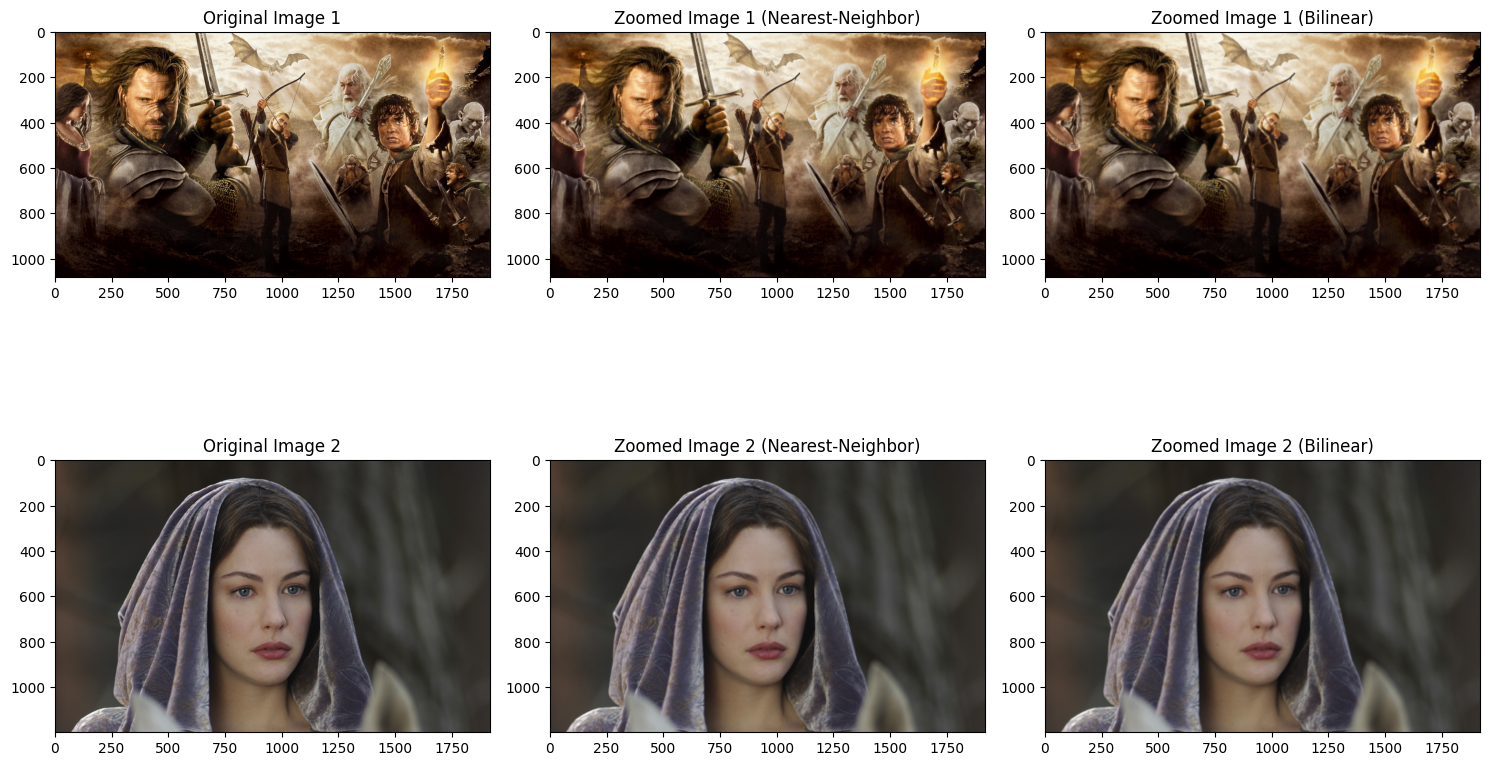

In [11]:
def zoom_image(image, factor, method):
    if method == 'nearest_neighbor':
        return cv2.resize(image, None, fx=factor, fy=factor, interpolation=cv2.INTER_NEAREST)
    elif method == 'bilinear':
        return cv2.resize(image, None, fx=factor, fy=factor, interpolation=cv2.INTER_LINEAR)
    else:
        raise ValueError("Invalid method. Please choose 'nearest_neighbor' or 'bilinear'.")

def compute_ssd(image1, image2):
    return np.sum((image1 - image2) ** 2) / (image1.shape[0] * image1.shape[1])

# Load the images
image_path1 = r"Img\a1q5images\im01.png"
image_path2 = r"Img\a1q5images\im02.png"
image_path1_small = r"Img\a1q5images\im01small.png"
image_path2_small = r"Img\a1q5images\im02small.png"

image1_large = cv2.imread(image_path1)
image2_large = cv2.imread(image_path2)
image1_small = cv2.imread(image_path1_small)
image2_small = cv2.imread(image_path2_small)

# Define the zoom factor
factor = 4.0

# Zoom the small images using nearest-neighbor interpolation
zoomed_image1_nearest_neighbor = zoom_image(image1_small, factor, 'nearest_neighbor')
zoomed_image2_nearest_neighbor = zoom_image(image2_small, factor, 'nearest_neighbor')

# Zoom the small images using bilinear interpolation
zoomed_image1_bilinear = zoom_image(image1_small, factor, 'bilinear')
zoomed_image2_bilinear = zoom_image(image2_small, factor, 'bilinear')

# Compute the SSD between the scaled-up images and the original images
ssd1_nearest_neighbor = compute_ssd(image1_large, zoomed_image1_nearest_neighbor)
ssd2_nearest_neighbor = compute_ssd(image2_large, zoomed_image2_nearest_neighbor)
ssd1_bilinear = compute_ssd(image1_large, zoomed_image1_bilinear)
ssd2_bilinear = compute_ssd(image2_large, zoomed_image2_bilinear)

# Display the results
print("SSD for image 1 (nearest-neighbor):", ssd1_nearest_neighbor)
print("SSD for image 2 (nearest-neighbor):", ssd2_nearest_neighbor)
print("SSD for image 1 (bilinear):", ssd1_bilinear)
print("SSD for image 2 (bilinear):", ssd2_bilinear)

# Display the original images and the zoomed images
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image 1')
plt.imshow(cv2.cvtColor(image1_large, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Zoomed Image 1 (Nearest-Neighbor)')
plt.imshow(cv2.cvtColor(zoomed_image1_nearest_neighbor, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 3)
plt.title('Zoomed Image 1 (Bilinear)')
plt.imshow(cv2.cvtColor(zoomed_image1_bilinear, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 4)
plt.title('Original Image 2')
plt.imshow(cv2.cvtColor(image2_large, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 5)
plt.title('Zoomed Image 2 (Nearest-Neighbor)')
plt.imshow(cv2.cvtColor(zoomed_image2_nearest_neighbor, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 6)
plt.title('Zoomed Image 2 (Bilinear)')
plt.imshow(cv2.cvtColor(zoomed_image2_bilinear, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

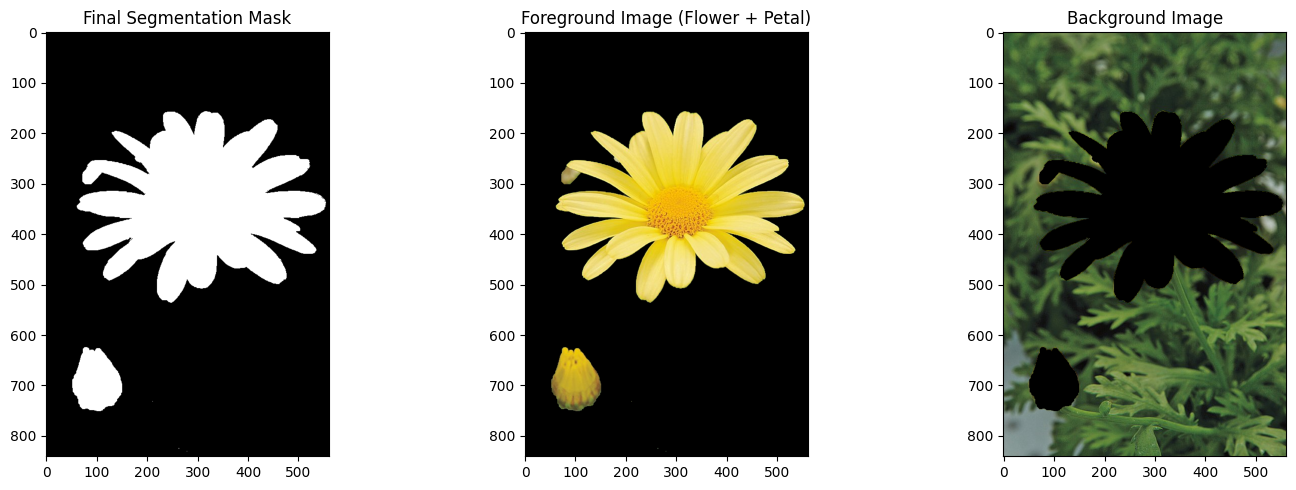

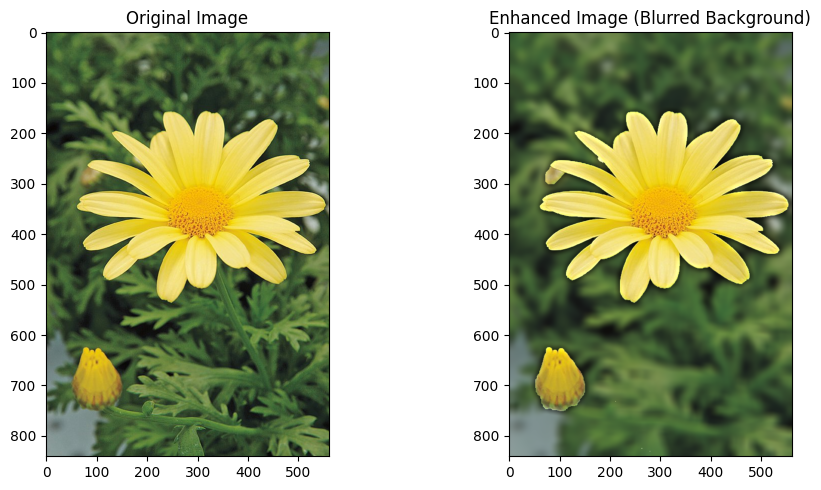

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"Img\daisy.jpg"  # Replace with the correct path to the image
image = cv2.imread(image_path)

# Define the two rectangles that contain the foreground (flower and petal)
rect1 = (50, 150, 550, 470)  # Main flower
rect2 = (40, 170, 600, 750)  # Petal

# Create a mask for GrabCut
mask = np.zeros(image.shape[:2], np.uint8)

# Define background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Apply GrabCut for the first rectangle (flower)
cv2.grabCut(image, mask, rect1, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask to mark the second rectangle (petal) as foreground
mask2 = np.zeros(image.shape[:2], np.uint8)  # Temporary mask for the second rect
cv2.grabCut(image, mask2, rect2, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Combine the two masks
mask = np.where((mask == 1) | (mask == 3) | (mask2 == 1) | (mask2 == 3), 255, 0).astype('uint8')

# Apply the mask to get the foreground (flower + petal)
foreground = cv2.bitwise_and(image, image, mask=mask)

# Apply the inverse mask to get the background
background = cv2.bitwise_and(image, image, mask=cv2.bitwise_not(mask))

# Blur the background
blurred_background = cv2.GaussianBlur(background, (21, 21), 11)

# Combine the foreground and blurred background to get the enhanced image
enhanced_image = cv2.add(foreground, blurred_background)

# Display the final segmentation mask, foreground image, and background image
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Final Segmentation Mask')
plt.imshow(mask, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Foreground Image (Flower + Petal)')
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title('Background Image')
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

# Display the original image and the enhanced image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Enhanced Image (Blurred Background)')
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()
